In [37]:
# GHOST - Advection Test (1D)

import sys  
import numpy as np
import modepy as mp
sys.path.insert(0, '../src')
from Mesh import Mesh1D
from Discretization import SpatialDiscretization
from Solver import Solver


# discretization order
p = 3

p_geo = p

# set up periodic mesh
mesh = Mesh1D("mesh1d", 0.0, 1.0, 4)
left = [1.0, 0.0]
right = [1.0, 1.0]
mesh.add_bc_on_hyperplanes([left,right],[1,2])
mesh.make_periodic([1,2])

mesh.map_mesh(f_map=Mesh1D.grid_transformation(warp_factor=0.1), p_geo=p_geo)


# volume quadrature order
tau = 4*p+1

# solver parameters
params = {"project_title": "adv_test_1d",
        "problem": "constant_advection",
         "initial_condition": "sine",
         "wavelength": np.array([1.0]),
          "wave_speed": np.ones(1),
          "upwind_parameter": 1.0,
         "integration_type": "quadrature",
         "solution_degree": p,
         "volume_quadrature_degree": tau,
         "form": "strong",
         "time_integrator": "rk44",
         "final_time": 1.0,
         "time_step_scale": 0.1}

# set up solver
solver = Solver(params,mesh)

dt =  0.017857142857142856


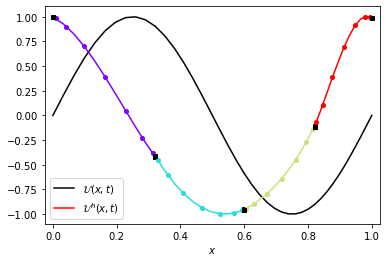

In [38]:
solver.run()
solver.post_process()
solver.plot(plot_nodes=True, plot_exact=True, geometry_resolution=50)

dt =  0.0025


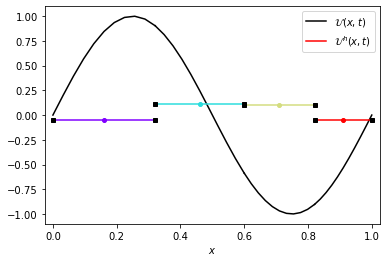

In [29]:
solver.T = 0.5
solver.run()
solver.post_process()
solver.plot(plot_nodes=True, plot_exact=True, geometry_resolution=50)

In [4]:
solver.discretization.J_omega

[array([0.16035534, 0.16035534, 0.16035534, 0.16035534]),
 array([0.13964466, 0.13964466, 0.13964466, 0.13964466]),
 array([0.11035534, 0.11035534, 0.11035534, 0.11035534]),
 array([0.08964466, 0.08964466, 0.08964466, 0.08964466])]

In [5]:
np.linalg.eigvals(solver.discretization.M_J)

array([[0.16035534, 0.16035534, 0.16035534, 0.16035534],
       [0.13964466, 0.13964466, 0.13964466, 0.13964466],
       [0.11035534, 0.11035534, 0.11035534, 0.11035534],
       [0.08964466, 0.08964466, 0.08964466, 0.08964466]])

In [13]:
[(mesh.v[0,k+1]-mesh.v[0,k])/2 for k in range(0,mesh.K)]

[0.16035533905932736,
 0.13964466094067263,
 0.11035533905932737,
 0.08964466094067264]

In [14]:
solver.discretization.M_J

[array([[ 1.60355339e-01, -1.04083409e-17,  9.23965717e-17,
         -1.38777878e-17],
        [-1.04083409e-17,  1.60355339e-01,  0.00000000e+00,
          6.01574645e-17],
        [ 1.02544186e-16, -1.38777878e-17,  1.60355339e-01,
         -9.36750677e-17],
        [ 0.00000000e+00,  5.94424899e-17, -9.54097912e-17,
          1.60355339e-01]]),
 array([[ 1.39644661e-01, -1.04083409e-17,  8.17529911e-17,
          0.00000000e+00],
        [-6.93889390e-18,  1.39644661e-01,  0.00000000e+00,
          5.03062191e-17],
        [ 9.06987528e-17,  0.00000000e+00,  1.39644661e-01,
         -6.93889390e-17],
        [ 0.00000000e+00,  4.72501250e-17, -8.32667268e-17,
          1.39644661e-01]]),
 array([[ 1.10355339e-01, -8.67361738e-19,  6.16167838e-17,
         -6.93889390e-18],
        [ 0.00000000e+00,  1.10355339e-01,  0.00000000e+00,
          3.86694169e-17],
        [ 7.39467810e-17, -6.93889390e-18,  1.10355339e-01,
         -5.72458747e-17],
        [ 0.00000000e+00,  3.82544373e-

In [18]:
solver.discretization.W_gamma

[[array([[1.]]), array([[1.]])]]